## Question 1

Min-Max scaling, also known as Min-Max normalization or feature scaling, is a data preprocessing technique used to scale and transform the numerical features of a dataset into a specific range, typically [0,1]. The purpose of Min-Max scaling is to ensure that all the features contribute equally to the computations in machine learning models, preventing certain features from dominating due to differences in their scales.

The formula used for min max scaling is given as (Xi-X min)/(X max - X min).
This transformation ensures that the scaled values fall within the [0, 1] range, with 0 corresponding to the minimum original value and 1 corresponding to the maximum original value.

Min amx scaling can be used in scaling the pixel values of an image where the pixel values ranges from 0-255, after scaling the values of  different pixels get limited within the range 0-1. This helps the neurons to learn more effectively.

Lets see an example of min max scaling on a custom dataset

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data={
    
    'Feat1':[2,5,8,12,15],
    'Feat2':[20,25,30,35,40],
    'Feat3':[1,2,3,4,5]
}

df=pd.DataFrame(data)
print("original dataset")
print(df)

scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled_data,columns=df.columns)
print("\nScaled Data")
print(scaled_df)

original dataset
   Feat1  Feat2  Feat3
0      2     20      1
1      5     25      2
2      8     30      3
3     12     35      4
4     15     40      5

Scaled Data
      Feat1  Feat2  Feat3
0  0.000000   0.00   0.00
1  0.230769   0.25   0.25
2  0.461538   0.50   0.50
3  0.769231   0.75   0.75
4  1.000000   1.00   1.00


## Question 2

Unit vector scaling, also known as vector normalization, is a data preprocessing technique used to scale and transform numerical features so that they become unit vectors. A unit vector is a vector with a length or magnitude of 1. In the context of feature scaling, unit vector scaling is applied to each individual data point, treating it as a vector in a multidimensional space. This transformation scales each feature of the vector by dividing it by the Euclidean norm of the vector. As a result, the transformed vector has a magnitude of 1, turning it into a unit vector.

Unit vector scaling is often used in machine learning when the direction of the data points is considered more important than their magnitudes. It is commonly applied in algorithms that involve measuring similarity or distance between data points, such as clustering or nearest neighbors algorithms.

In [6]:
import numpy as np
original_vector=np.array([3,4,5])

magnitude=np.linalg.norm(original_vector)
normalized_vector=original_vector/magnitude

print("original vector",original_vector)
print("Normalized vector(unit vector)",normalized_vector)

original vector [3 4 5]
Normalized vector(unit vector) [0.42426407 0.56568542 0.70710678]


## Question 3

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and data analysis. Its primary goal is to transform high-dimensional data into a lower-dimensional representation while retaining as much of the original variability or information as possible. PCA achieves this by identifying and capturing the principal components of the data, which are new uncorrelated variables that represent the directions of maximum variance.

PCA starts by calculating the covariance matrix of the original data. The covariance matrix describes how each feature in the dataset varies with every other feature. The next step involves finding the eigenvalues and corresponding eigenvectors of the covariance matrix. Eigenvectors represent the directions of maximum variance in the data, and eigenvalues indicate the magnitude of variance in each of those directions. The eigenvectors are ranked based on their corresponding eigenvalues, and the top k eigenvectors are selected to form the principal components. These principal components are the new set of uncorrelated variables.

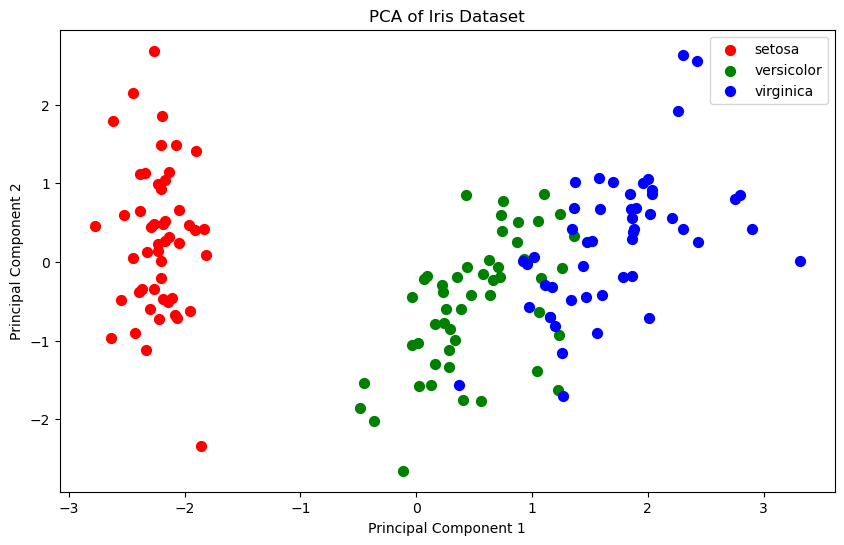

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Applying PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = target

plt.figure(figsize=(10, 6))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'Principal Component 1'],
                df_pca.loc[indices_to_keep, 'Principal Component 2'],
                c=color, s=50)

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(iris.target_names)
plt.show()


## Question 4

Principal Component Analysis (PCA) and feature extraction are closely related concepts in machine learning. PCA can be used as a feature extraction technique to transform high-dimensional data into a lower-dimensional representation by capturing the most important information in the form of principal components.
PCA is primarily used for dimensionality reduction. It identifies a new set of uncorrelated variables called principal components that represent the directions of maximum variance in the data. By selecting a subset of these principal components, we achieve dimensionality reduction, effectively extracting the most important information from the original features.

Feature extraction with PCA involves selecting the top k principal components, where k is the desired reduced dimensionality, to retain most of the information in the data.

Lets continue with the example of iris data shown above

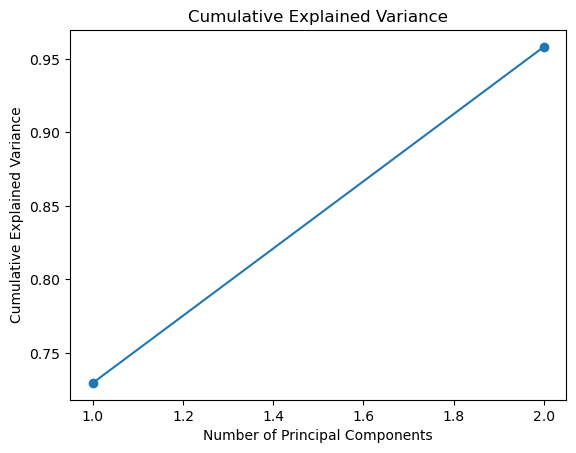

In [15]:
explained_variance_ratio=pca.explained_variance_ratio_

cumulative_explained_variance=np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

The plot shows the cumulative explained variance as a function of the number of principal components. It helps us decide how many principal components to retain. In practice, we might choose the number of components that capture a sufficiently high percentage of the total variance.

## Question 5

When working on a recommendation system for a food delivery service with a dataset containing features like price, rating, and delivery time, Min-Max scaling can be used to preprocess the data. Min-Max scaling transforms the numerical features to a specific range, typically [0, 1], making them comparable and preventing features with different scales from dominating the recommendation algorithm. Which means that the numeric value of price being higher than the rating and delivery time may cause biasness in our model therefore to remove such biasness from our model we use scaling techniques and Min-Max Scaler is a great technique to do so.

## Question 6

When dealing with a dataset for predicting stock prices that includes numerous features like company financial data and market trends, Principal Component Analysis (PCA) can be a valuable technique for reducing dimensionality. First we understand the dataset completely and the features in our dataset. Then comes the preprocessing part where we handle the missing values, and outliers along with scaling of the data using StandardScaler because Principle component analysis is sensitive to the scale of the data. After that we use PCA to transform the standardized data into its principal components by specifying the number of components.

## Question 7

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
data={
    'Feature':[1,5,10,15,20]
}
df=pd.DataFrame(data)
print("original DataFrame")
print(df)
scaled_data=scaler.fit_transform(df)
df_scaled=pd.DataFrame(scaled_data,columns=df.columns)
print('\nScaled DataFrame')
print(df_scaled)

original DataFrame
   Feature
0        1
1        5
2       10
3       15
4       20

Scaled DataFrame
    Feature
0  0.000000
1  0.210526
2  0.473684
3  0.736842
4  1.000000


## Question 8

Let's suppose we have a dataset with features  [height, weight, age, gender, blood pressure]. We can select the principle components to retain based on the desired level of explained variance and specific goals of the analysis. In context of PCA one common approach is to use the cumulative explained variance using the np.cumsum() to determine the number of principle components to retain.

For example if we set the thresholding value to be 95% then we'll capture only the components with the cumulative explained ratio higher than the threshold parameter.